<a href="https://colab.research.google.com/github/anandramm/Machine_learning-/blob/master/SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
#!pip install pmdarima [install pyramid ARIMA to get the best parameters]

     |████████████████████████████████| 1.5MB 5.6MB/s 
     |████████████████████████████████| 9.5MB 50.0MB/s 
     |████████████████████████████████| 2.1MB 45.5MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [2]:
from pmdarima import auto_arima

In [7]:
df=pd.read_csv('/content/co2_mm_mlo.csv')

In [29]:
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [12]:
df['date']=pd.to_datetime({'year':df['year'],'month':df['month'],'day':1})

In [31]:
df.set_index('date',inplace=True)

In [17]:
df.index.freq='MS'

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [22]:
df.isnull().sum()

year            0
month           0
decimal_date    0
average         7
interpolated    0
date            0
dtype: int64

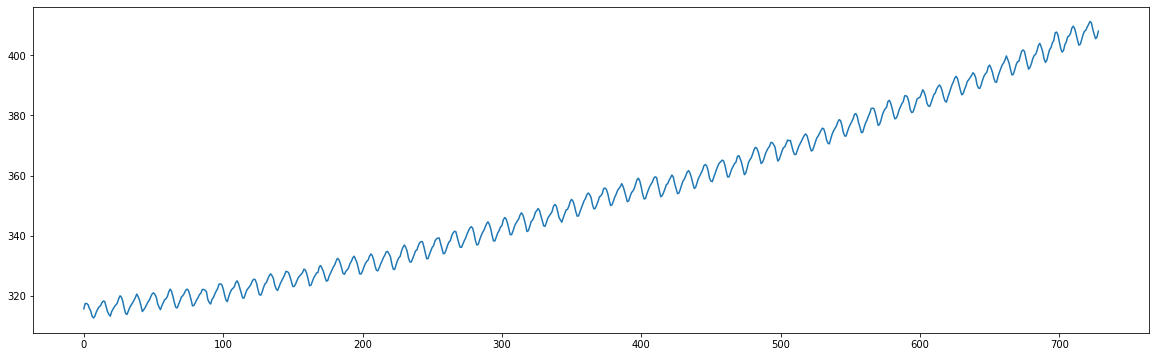

In [25]:
df['interpolated'].plot(figsize=(20,6))

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

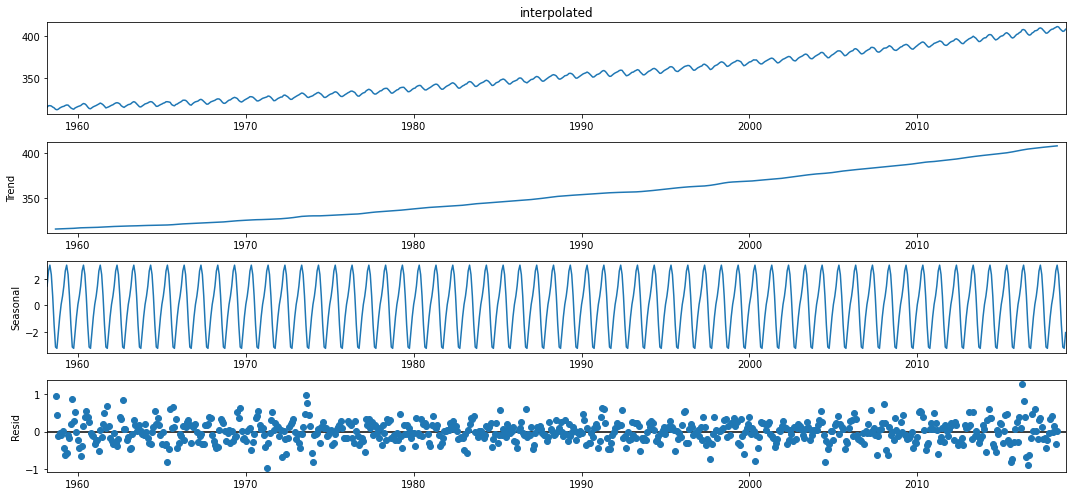

In [40]:
decomp=seasonal_decompose(df['interpolated'],model='add')
pylab.rcParams['figure.figsize']=15,7
decomp.plot();

In [42]:
auto_arima(df['interpolated'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  729
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -205.693
Date:                              Wed, 20 Jan 2021   AIC                            423.387
Time:                                      07:58:33   BIC                            450.929
Sample:                                           0   HQIC                           434.014
                                              - 729                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3549      0.034    -10.294      0.000      -0.422      -0.287
ma.L2         -0.0230      0.032     -0.712      0.476      -0.086       0.040
ma.L3         -0.0836      0.032     -2.607      0.009      -0.146      -0.021
ar.S.L12       0.9996      0.000   2988.504      0.000       0.999       1.000
ma.S.L12      -0.8666      0.021    -40.715      0.000      -0.908      -0.825
sigma2         0.0956      0.005     20.342      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 4.03
Prob(Q):                              0.77   Prob(JB):                         0.13
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
train_df=df.iloc[ :717]
test_df=df.iloc[717: ]

In [54]:
model=SARIMAX(train_df['interpolated'],order=(0, 1, 3),seasonal_order=(1, 0, [1], 12))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [47]:
help(SARIMAX)

Help on class SARIMAX in module statsmodels.tsa.statespace.sarimax:

class SARIMAX(statsmodels.tsa.statespace.mlemodel.MLEModel)
 |  Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors
 |  model
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The observed time-series process :math:`y`
 |  exog : array_like, optional
 |      Array of exogenous regressors, shaped nobs x k.
 |  order : iterable or iterable of iterables, optional
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters. `d` must be an integer
 |      indicating the integration order of the process, while
 |      `p` and `q` may either be an integers indicating the AR and MA
 |      orders (so that all lags up to those orders are included) or else
 |      iterables giving specific AR and / or MA lags to include. Default is
 |      an AR(1) model: (1,0,0).
 |  seasonal_order : iterable, optional
 |      The (P,D,Q,s) order of the 

In [55]:
model_fit=model.fit()

In [56]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -201.190
Date:                              Wed, 20 Jan 2021   AIC                            414.380
Time:                                      08:40:00   BIC                            441.823
Sample:                                  03-01-1958   HQIC                           424.977
                                       - 11-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3544      0.035    -10.114      0.000      -0.423      -0.286
ma.L2         -0.0246      0.027     -0.898      0.369      -0.078       0.029
ma.L3         -0.0862      0.033     -2.595      0.009      -0.151      -0.021
ar.S.L12       0.9996      0.000   2978.796      0.000       0.999       1.000
ma.S.L12      -0.8651      0.022    -38.820      0.000      -0.909      -0.821
sigma2         0.0951      0.005     20.299      0.000       0.086       0.104
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 4.32
Prob(Q):                              0.78   Prob(JB):                         0.12
Heteroskedasticity (H):               1.15   Skew:                             0.02
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
start =len(train_df)
end=len(train_df)+len(test_df)-1

In [65]:
predictions=model_fit.predict(start,end)

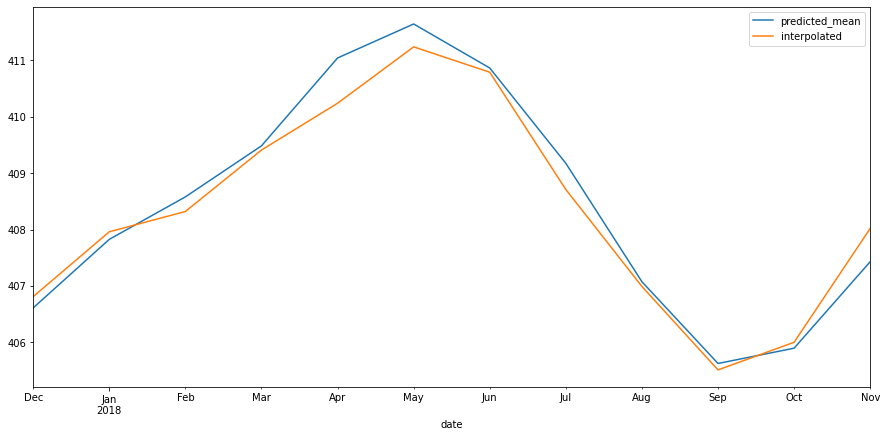

In [66]:
predictions.plot(legend=True)
test_df['interpolated'].plot(legend=True)

In [67]:
forecast=model.fit()


In [68]:
future_values=forecast.predict(start,end+12)

In [69]:
future_values

2017-12-01    406.610222
2018-01-01    407.825758
2018-02-01    408.579221
2018-03-01    409.484389
2018-04-01    411.042760
2018-05-01    411.646111
2018-06-01    410.865299
2018-07-01    409.174427
2018-08-01    407.074006
2018-09-01    405.623935
2018-10-01    405.895167
2018-11-01    407.429555
2018-12-01    408.863250
2019-01-01    410.066668
2019-02-01    410.812714
2019-03-01    411.717550
2019-04-01    413.275348
2019-05-01    413.878477
2019-06-01    413.097953
2019-07-01    411.407701
2019-08-01    409.308052
2019-09-01    407.858514
2019-10-01    408.129646
2019-11-01    409.663471
Freq: MS, Name: predicted_mean, dtype: float64